<a href="https://colab.research.google.com/github/srilaadebnath/ML_LAB_CODES/blob/main/question10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

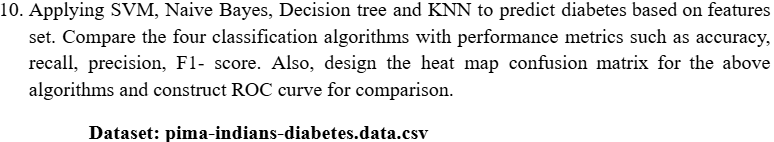

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score, recall_score, precision_score, f1_score,
    confusion_matrix, roc_curve, auc
)

In [ ]:
data = pd.read_csv("pima-indians-diabetes.data.csv")

data.columns = [
    'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
    'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'
]

print("Dataset shape:", data.shape)
print("\nFirst 5 rows:\n", data.head())
print("\nMissing values:\n", data.isnull().sum())

Dataset shape: (767, 9)

First 5 rows:
    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            1       85             66             29        0  26.6   
1            8      183             64              0        0  23.3   
2            1       89             66             23       94  28.1   
3            0      137             40             35      168  43.1   
4            5      116             74              0        0  25.6   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.351   31        0  
1                     0.672   32        1  
2                     0.167   21        0  
3                     2.288   33        1  
4                     0.201   30        0  

Missing values:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outco

In [ ]:
X = data.drop('Outcome', axis=1)
y = data['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

models = {
    'SVM (RBF)': SVC(kernel='rbf', probability=True, random_state=42),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5)
}

results = {}

In [ ]:
for name, model in models.items():
    print(f"\n--- {name} ---")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    acc = accuracy_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    pre = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    print(f"Accuracy: {acc:.3f}")
    print(f"Recall: {rec:.3f}")
    print(f"Precision: {pre:.3f}")
    print(f"F1-Score: {f1:.3f}")
    print("Confusion Matrix:\n", cm)

    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    results[name] = {
        'accuracy': acc, 'recall': rec, 'precision': pre, 'f1': f1,
        'cm': cm, 'fpr': fpr, 'tpr': tpr, 'auc': roc_auc
    }


--- SVM (RBF) ---
Accuracy: 0.708
Recall: 0.519
Precision: 0.596
F1-Score: 0.554
Confusion Matrix:
 [[81 19]
 [26 28]]

--- Naive Bayes ---
Accuracy: 0.669
Recall: 0.519
Precision: 0.528
F1-Score: 0.523
Confusion Matrix:
 [[75 25]
 [26 28]]

--- Decision Tree ---
Accuracy: 0.688
Recall: 0.500
Precision: 0.562
F1-Score: 0.529
Confusion Matrix:
 [[79 21]
 [27 27]]

--- KNN ---
Accuracy: 0.708
Recall: 0.537
Precision: 0.592
F1-Score: 0.563
Confusion Matrix:
 [[80 20]
 [25 29]]


In [ ]:
metrics_df = pd.DataFrame({
    name: {
        'Accuracy': results[name]['accuracy'],
        'Recall': results[name]['recall'],
        'Precision': results[name]['precision'],
        'F1-Score': results[name]['f1']
    } for name in results
}).T

print("\n=== Model Performance Comparison ===")
print(metrics_df)


=== Model Performance Comparison ===
               Accuracy    Recall  Precision  F1-Score
SVM (RBF)      0.707792  0.518519   0.595745  0.554455
Naive Bayes    0.668831  0.518519   0.528302  0.523364
Decision Tree  0.688312  0.500000   0.562500  0.529412
KNN            0.707792  0.537037   0.591837  0.563107


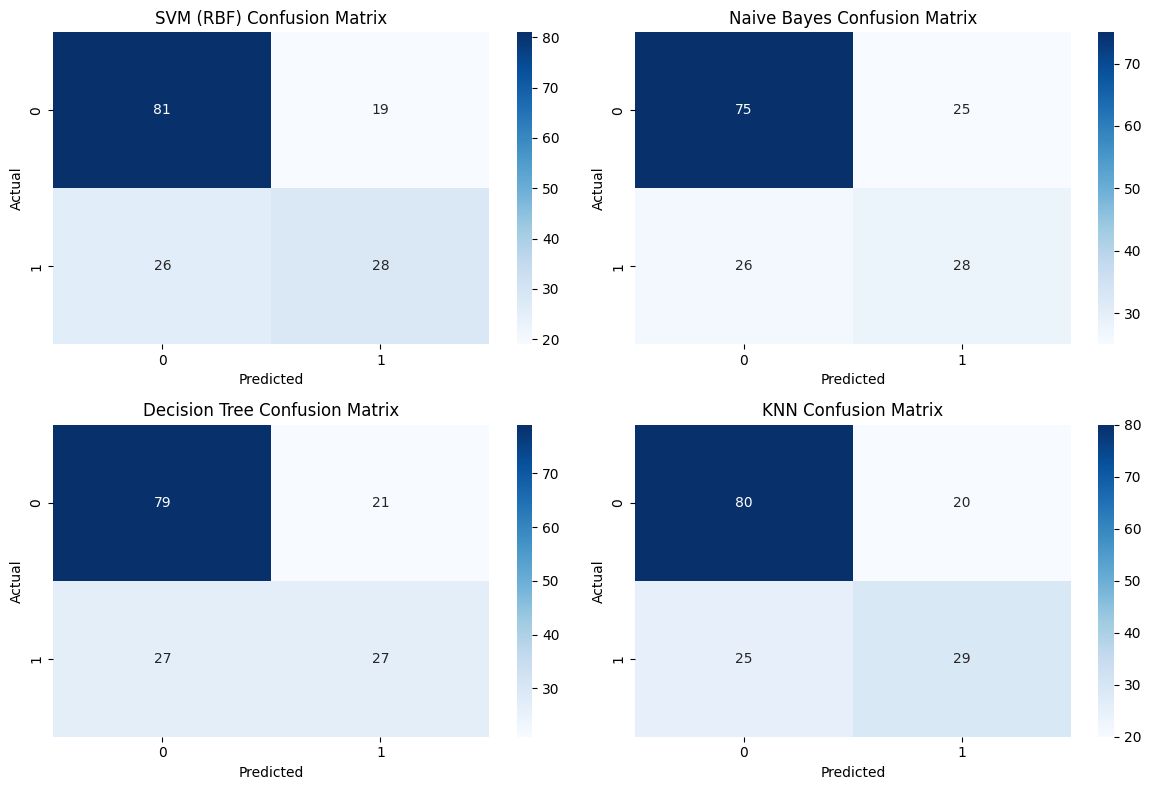

In [ ]:
plt.figure(figsize=(12, 8))
for i, (name, res) in enumerate(results.items(), 1):
    plt.subplot(2, 2, i)
    sns.heatmap(res['cm'], annot=True, fmt='d', cmap='Blues')
    plt.title(f"{name} Confusion Matrix")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
plt.tight_layout()
plt.show()

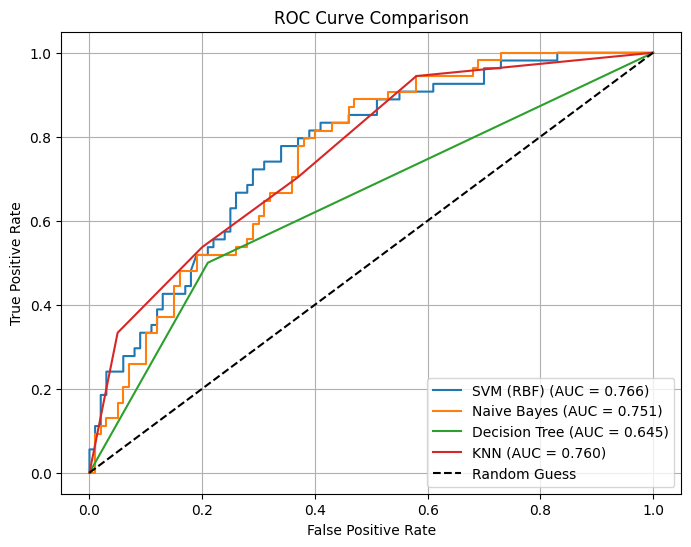

In [ ]:
plt.figure(figsize=(8, 6))
for name, res in results.items():
    plt.plot(res['fpr'], res['tpr'], label=f"{name} (AUC = {res['auc']:.3f})")

plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()